## Final Project Submission

Please fill out:
* Student name: Joe Guy
* Student pace:  part time 
* Scheduled project review date/time: 03/08/19 3pm
* Instructor name: Joe San Pietro
* Blog post URL: https://github.com/josephguy02/Module_1_project.git


## Intro

During this project I used the OSEMN (Obtain, Scrub, Explore, Model, iNterpret) approach to determine the best predictor of price based on the King County House Sales dataset.  The datase was scrubbed of any null values or improper strings.  It was then normalized and explored for relationships between predictors.  A model was then created to identify statistically significant relationships between the dependent variable, price, and all other independent variables in the dataset.
The model also highlighed the "ordinary least squares" fit of the data, a measurement of how much error lies in the comparisons.  Finally the relationships were interpreted to explain the numerical effects on price by these independent variables.

## Obtaining - Importing programs and files

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [299]:
df = pd.read_csv("kc_house_data.csv")

## Scrubbing the dataset

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [301]:
df = df.drop(['id'], axis=1) #ID is not useful to us it is an index
df = df.drop(['date'], axis=1) # not using datetime trending in this model

There are missing values in waterfront, view, yr_renovated.  

In [302]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [303]:
df.dropna(subset=['view'], inplace=True) #remove rows containing nulls in the view column

There are too many nulls in waterfront and yr_renovated.  Will bin out the nulls.  

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.3+ MB


In [306]:
df.waterfront.value_counts() #waterfront is a categorical column, 0 = not on the waterfront, 1 = on the waterfront.  

0.0    19019
1.0      145
Name: waterfront, dtype: int64

In [307]:
df.waterfront=df.waterfront.fillna(2) #filling the nulls with 2. This bin will represent data that will be dropped.

In [308]:
df.waterfront.value_counts()

0.0    19019
2.0     2370
1.0      145
Name: waterfront, dtype: int64

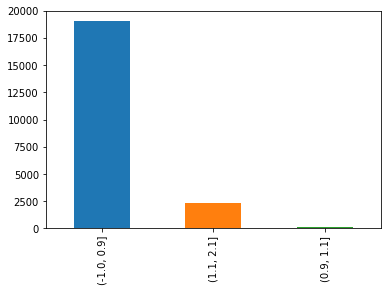

In [309]:
bins_waterfront = [-1, .9, 1.1, 2.1]
# use pd.cut
bins_waterfront = pd.cut(df['waterfront'], bins_waterfront)
bins_waterfront = bins_waterfront.cat.as_unordered()
bins_waterfront.value_counts().plot(kind='bar')

In [310]:
df["waterfront"]=bins_waterfront

In [311]:
df.yr_renovated.value_counts() #There are many more properties that have not been renovated; not renovated = 0. 

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1994.0       14
1985.0       14
1986.0       14
1987.0       14
1992.0       13
1997.0       12
1993.0       12
1996.0       11
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [312]:
df.yr_renovated = df.yr_renovated.fillna(1) #Replacing the null values with a 1.

In [313]:
df.yr_renovated.value_counts()

0.0       16961
1.0        3830
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1997.0       12
1993.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

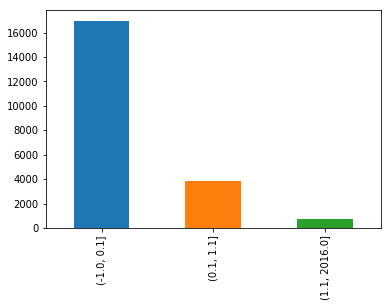

In [314]:
#binning to create columns for renovated = y, renovated = n, and renovated = N/A
bins_yr_renovated = [-1, .1, 1.1, 2016]
bins_yr_renovated = pd.cut(df['yr_renovated'], bins_yr_renovated)
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_yr_renovated.value_counts().plot(kind='bar')

In [315]:
df["yr_renovated"]=bins_yr_renovated

In [316]:
df.info() #All nulls removed.  Will drop the null columns from yr_renovated and waterfront after one hot encoding.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null category
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: category(2), float64(6), int64(10), object(1)
memory usage: 3.0+ MB


In [317]:
df.sqft_basement.value_counts() #listed with an object datatype

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
450.0       103
530.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
          ...  
875.0         1
3260.0        1
1913.0        1
172.0         1
915.0         1
248.0         1
2730.0        1
2810.0        1
1024.0        1
2190.0        1
3480.0        1
768.0         1
243.0         1
274.0         1
2400.0        1
652.0         1
1920.0        1
207.0         1
1840.0        1
143.0         1
276.0         1
417.0         1
2580.0        1
2120.0        1
556.0         1
2600.0        1
65.0          1
3500.0        1
1960.0        1
704.0         1
Name: sqft_basement, Len

In [318]:
df = df[df.sqft_basement != '?'] #remove '?' from the sqft_basement column

In [319]:
df.view = df.view.astype('int64')

In [320]:
df.floors = df.floors.astype('int64')

In [321]:
#What else is categorical, changing datatype to category for scatterplot display.
df.floors = df.floors.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.floors = df.floors.astype('category')
df.sqft_basement = df.sqft_basement.astype('float64')

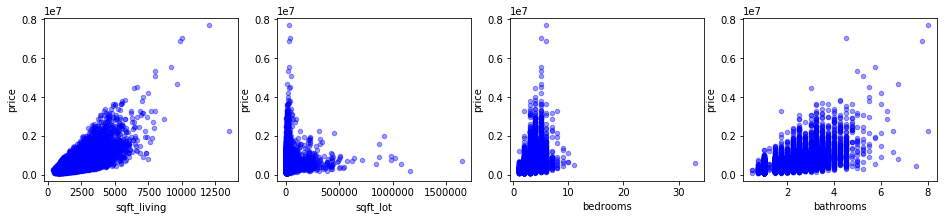

In [322]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Sqft_living shows a high degree of linearity with price.  Sqft_lot is heavily skewed toward 0, but is numerical.  Bedrooms and bathrooms are categorical and need to be binned.

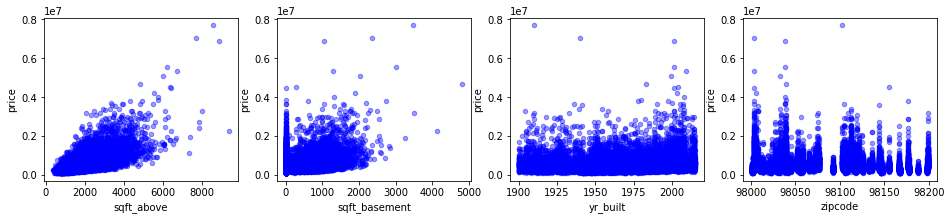

In [323]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_above', 'sqft_basement', 'yr_built', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Sqft_above is linear with price as well.  Sqft_basement is not linear, but numerical.  Yr_built shows very little linearity. Zipcodes are categorical, need to be binned.

In [324]:
df.zipcode = df.zipcode.astype('category')

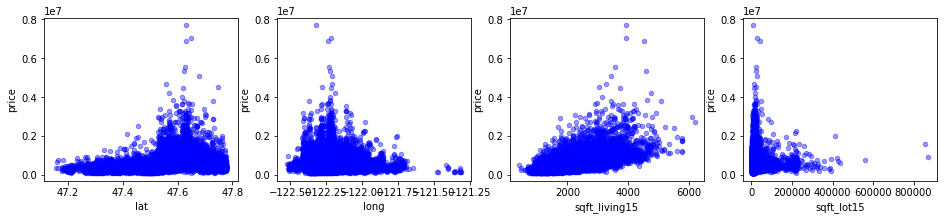

In [325]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Lat and long do not show linearity, need to look at histogram to determine if it needs normalization.  Sqft_living15 is linear with price.  Sqft_lot15 is heavily skewed toward 0.

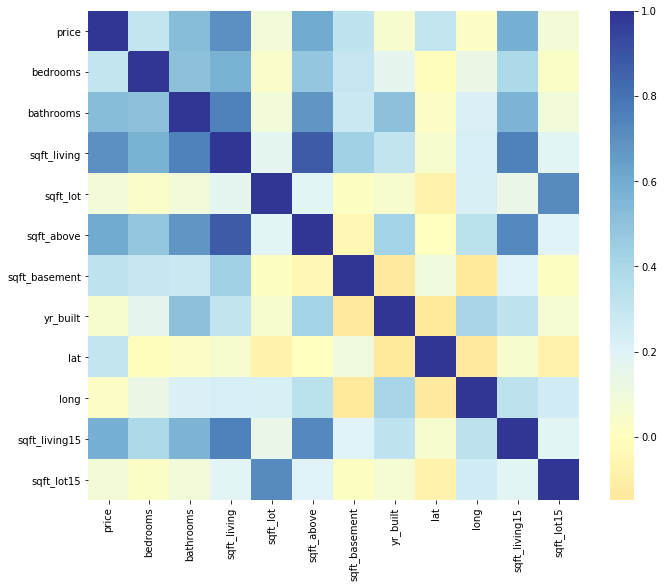

In [326]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), center=0, cmap='RdYlBu',);

In [327]:
abs(df.corr()) >0.75 #Positive correlation between sqft living and above columns.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,False,False,True,False,False


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null category
zipcode          21082 non-null category
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(7), float64(5), int64(7)
memory usage: 2.2 MB


In [329]:
#normalizing the numerical data.
df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()
df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.yr_built = (df.yr_built - df.yr_built.mean()) / df.yr_built.std()
df.lat = (df.lat - df.lat.mean()) / df.lat.std()
df.long = (df.long - df.long.mean()) / df.long.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

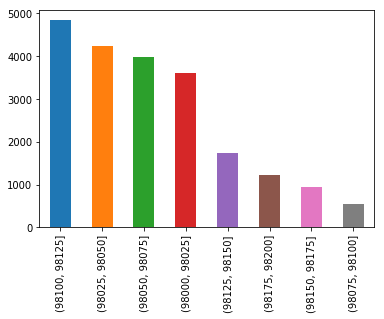

In [332]:
bins_zipcode = [98000, 98025, 98050, 98075, 98100, 98125, 98150, 98175, 98200]
bins_zipcode = pd.cut(df['zipcode'], bins_zipcode)
bins_zipcode = bins_zipcode.cat.as_unordered()
bins_zipcode.value_counts().plot(kind='bar')

In [333]:
df["zipcode"]=bins_zipcode

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null category
zipcode          21082 non-null category
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(7), float64(12)
memory usage: 2.2 MB


In [335]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,1,"(1.1, 2.1]",0,3,7,-0.735179,-0.659174,-0.546440,"(-1.0, 0.1]","(98175, 98200]",-0.354849,-0.306933,-0.943655,-0.260878
1,538000.0,-0.402600,0.174556,0.533460,-0.190307,2,"(-1.0, 0.9]",0,3,7,0.459940,0.245788,-0.682852,"(1.1, 2016.0]","(98100, 98125]",1.159208,-0.747879,-0.433112,-0.187615
2,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,1,"(-1.0, 0.9]",0,3,6,-1.230128,-0.659174,-1.296702,"(0.1, 1.1]","(98025, 98050]",1.281170,-0.136245,1.069344,-0.172034
3,604000.0,0.678486,1.150938,-0.131132,-0.244760,1,"(-1.0, 0.9]",0,5,7,-0.892114,1.399613,-0.205413,"(-1.0, 0.1]","(98125, 98150]",-0.285569,-1.274170,-0.914481,-0.284820
4,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,1,"(-1.0, 0.9]",0,3,8,-0.131584,-0.659174,0.544849,"(-1.0, 0.1]","(98050, 98075]",0.407231,1.200818,-0.272656,-0.192624


In [336]:
df = pd.get_dummies(df)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 50 columns):
price                         21082 non-null float64
bedrooms                      21082 non-null float64
bathrooms                     21082 non-null float64
sqft_living                   21082 non-null float64
sqft_lot                      21082 non-null float64
sqft_above                    21082 non-null float64
sqft_basement                 21082 non-null float64
yr_built                      21082 non-null float64
lat                           21082 non-null float64
long                          21082 non-null float64
sqft_living15                 21082 non-null float64
sqft_lot15                    21082 non-null float64
floors_1                      21082 non-null uint8
floors_2                      21082 non-null uint8
floors_3                      21082 non-null uint8
waterfront_(-1.0, 0.9]        21082 non-null uint8
waterfront_(0.9, 1.1]         21082 non-null uint8


In [338]:
df.rename(columns={'waterfront_(-1.0, 0.9]': 'waterfront_no', 'waterfront_(0.9, 1.1]':'waterfront_yes', 'waterfront_(1.1, 2.1]':'waterfront_na', 'yr_renovated_(-1.0, 0.1]':'renovated_no', 'yr_renovated_(0.1, 1.1]':'renovated_na', 'yr_renovated_(1.1, 2016.0]':'renovated_yes'}, inplace=True)

In [339]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1', 'floors_2', 'floors_3',
       'waterfront_no', 'waterfront_yes', 'waterfront_na', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'renovated_no', 'renovated_na',
       'renovated_yes', 'zipcode_(98000, 98025]', 'zipcode_(98025, 98050]',
       'zipcode_(98050, 98075]', 'zipcode_(98075, 98100]',
       'zipcode_(98100, 98125]', 'zipcode_(98125, 98150]',
       'zipcode_(98150, 98175]', 'zipcode_(98175, 98200]'],
      dtype='object')

In [347]:
df.rename(columns={'zipcode_(98000, 98025]':'zipcode_98000_98025', 'zipcode_(98025, 98050]':'zipcode_98025_98050',
       'zipcode_(98050, 98075]': 'zipcode_98050_98075', 'zipcode_(98075, 98100]':'zipcode_98075_98100'}, inplace=True)

In [350]:
df.rename(columns={
       'zipcode_(98100, 98125]':'zipcode_98100_98125','zipcode_(98125, 98150]':'zipcode_98125_98150','zipcode_(98150, 98175]':'zipcode_98150_98175', 'zipcode_(98175, 98200]' : 'zipcode_98175_98200'}, inplace=True)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 50 columns):
price                  21082 non-null float64
bedrooms               21082 non-null float64
bathrooms              21082 non-null float64
sqft_living            21082 non-null float64
sqft_lot               21082 non-null float64
sqft_above             21082 non-null float64
sqft_basement          21082 non-null float64
yr_built               21082 non-null float64
lat                    21082 non-null float64
long                   21082 non-null float64
sqft_living15          21082 non-null float64
sqft_lot15             21082 non-null float64
floors_1               21082 non-null uint8
floors_2               21082 non-null uint8
floors_3               21082 non-null uint8
waterfront_no          21082 non-null uint8
waterfront_yes         21082 non-null uint8
waterfront_na          21082 non-null uint8
view_0                 21082 non-null uint8
view_1                 21082 no

In [352]:
df = df.drop(['waterfront_na', 'renovated_na'], axis=1)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 48 columns):
price                  21082 non-null float64
bedrooms               21082 non-null float64
bathrooms              21082 non-null float64
sqft_living            21082 non-null float64
sqft_lot               21082 non-null float64
sqft_above             21082 non-null float64
sqft_basement          21082 non-null float64
yr_built               21082 non-null float64
lat                    21082 non-null float64
long                   21082 non-null float64
sqft_living15          21082 non-null float64
sqft_lot15             21082 non-null float64
floors_1               21082 non-null uint8
floors_2               21082 non-null uint8
floors_3               21082 non-null uint8
waterfront_no          21082 non-null uint8
waterfront_yes         21082 non-null uint8
view_0                 21082 non-null uint8
view_1                 21082 non-null uint8
view_2                 21082 no

Data scrubbed, normalized, and one hot encoded.

In [354]:
df.to_csv('student_scrub.csv')

## Exploring

In [355]:
for cat_names in df.iloc[:,12:].columns:
         df[cat_names] = df[cat_names].astype('category')

In [356]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,21082.000000,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04
mean,5.402469e+05,-7.414828e-17,-3.019857e-16,1.941337e-16,2.696301e-18,0.000000,3.505191e-17,-1.013809e-15,-2.467503e-14,9.732838e-14,-5.931862e-17,5.392602e-18
std,3.667323e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.564772e+00,-2.103670e+00,-1.863429e+00,-3.535680e-01,-1.713004,-6.591737e-01,-2.422093e+00,-2.918930e+00,-2.170286e+00,-2.316287e+00,-4.450113e-01
25%,3.220000e+05,-4.025997e-01,-4.763658e-01,-7.085640e-01,-2.437883e-01,-0.711035,-6.591737e-01,-6.487487e-01,-6.426134e-01,-8.118877e-01,-7.248510e-01,-2.811365e-01
50%,4.500000e+05,-4.025997e-01,1.745558e-01,-1.856063e-01,-1.811264e-01,-0.276447,-6.591737e-01,1.356153e-01,8.536787e-02,-1.149085e-01,-2.143077e-01,-1.880937e-01
75%,6.450000e+05,6.784864e-01,5.000166e-01,5.116705e-01,-1.063755e-01,0.508227,6.077721e-01,8.858765e-01,8.503345e-01,6.318550e-01,5.442137e-01,-9.738058e-02
max,7.700000e+06,3.202998e+01,7.660154e+00,1.248522e+01,3.974125e+01,9.200002,1.024561e+01,1.499727e+00,1.567671e+00,6.392602e+00,6.160190e+00,3.162085e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299D460EA58>,
      dtype=object)

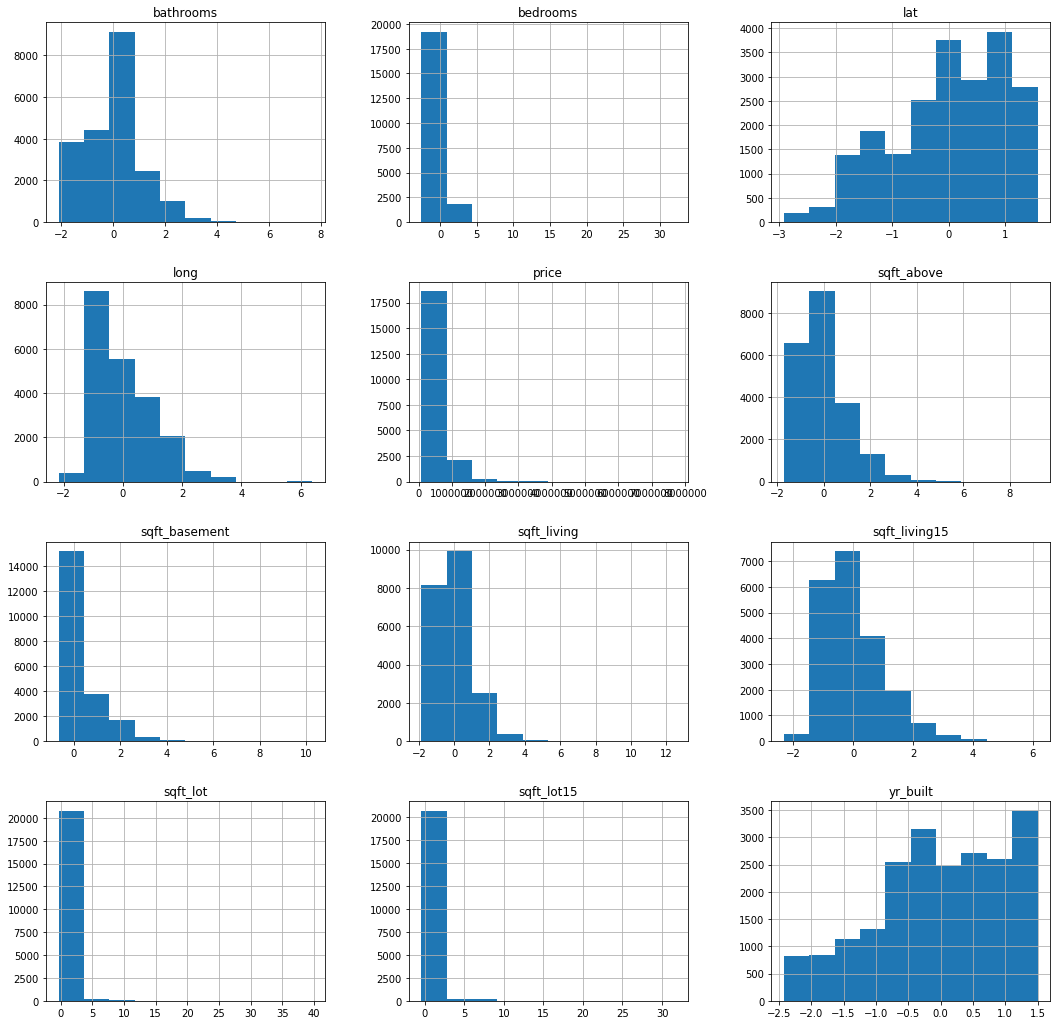

In [357]:
df.hist(figsize=(18,18))

Bedrooms, price, sqft_lot, and sqft_lot15 look to have outliers.  Most histograms are skewed.    

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


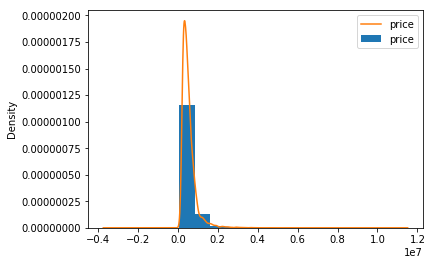

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


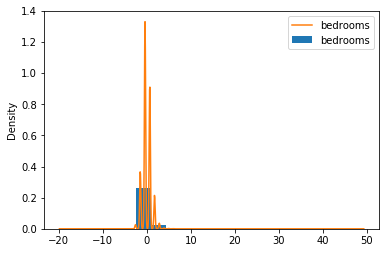

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


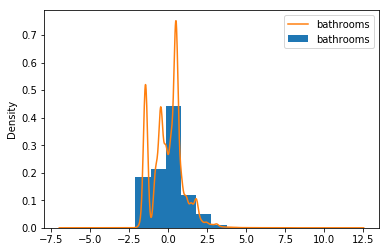

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


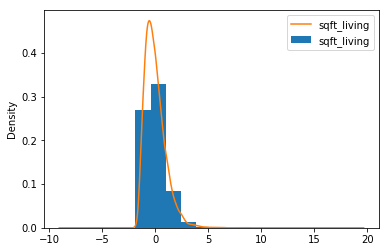

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


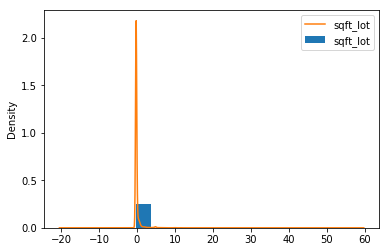

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


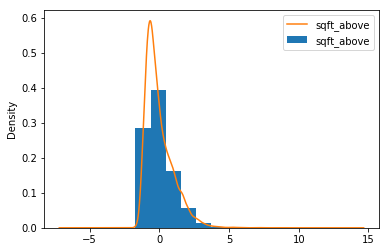

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


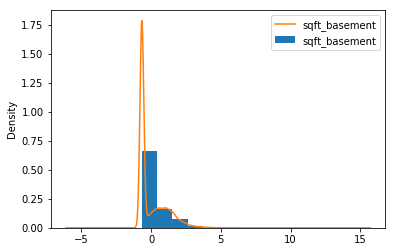

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


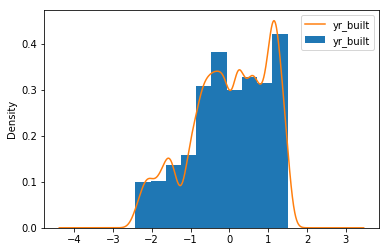

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


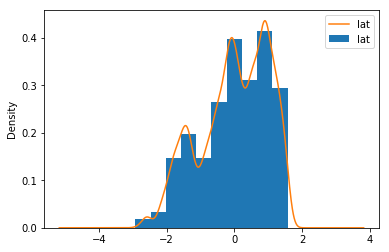

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


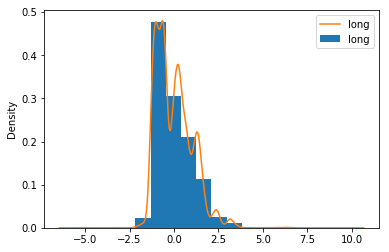

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


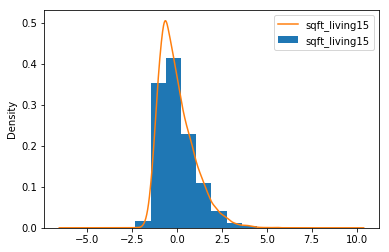

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


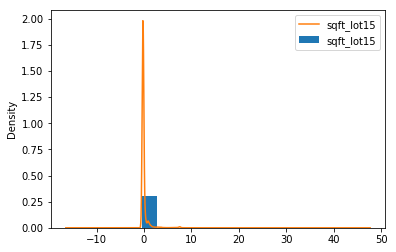

In [358]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built','lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

## Modeling

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 48 columns):
price                  21082 non-null float64
bedrooms               21082 non-null float64
bathrooms              21082 non-null float64
sqft_living            21082 non-null float64
sqft_lot               21082 non-null float64
sqft_above             21082 non-null float64
sqft_basement          21082 non-null float64
yr_built               21082 non-null float64
lat                    21082 non-null float64
long                   21082 non-null float64
sqft_living15          21082 non-null float64
sqft_lot15             21082 non-null float64
floors_1               21082 non-null category
floors_2               21082 non-null category
floors_3               21082 non-null category
waterfront_no          21082 non-null category
waterfront_yes         21082 non-null category
view_0                 21082 non-null category
view_1                 21082 non-null category
view_2    

In [360]:
import statsmodels.formula.api as smf

In [361]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King Cty: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King Cty: price~bedrooms
------------------------------
['bedrooms', 0.09514380839134184, 540246.8904752871, 113120.01945780392, 0.0]
King Cty: price~bathrooms
------------------------------
['bathrooms', 0.27565534211705833, 540246.8904752871, 192545.07397680086, 0.0]
King Cty: price~sqft_living
------------------------------
['sqft_living', 0.49280911924669435, 540246.8904752871, 257447.43745887777, 0.0]
King Cty: price~sqft_lot
------------------------------
['sqft_lot', 0.007814472143692908, 540246.8904752871, 32418.9563158288, 7.585998491378811e-38]
King Cty: price~sqft_above
------------------------------
['sqft_above', 0.36660773487327236, 540246.8904752871, 222049.6113491868, 0.0]
King Cty: price~sqft_basement
------------------------------
['sqft_basement', 0.10434033600616388, 540246.8904752871, 118460.9799624354, 0.0]
King Cty: price~yr_built
------------------------------
['yr_built', 0.0030084646048749164, 540246.8904752871, 20115.075114976946, 1.59351169919941e-15]
King C

In [362]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0951438,540247,113120,0
2,bathrooms,0.275655,540247,192545,0
3,sqft_living,0.492809,540247,257447,0
4,sqft_lot,0.00781447,540247,32419,7.586e-38
5,sqft_above,0.366608,540247,222050,0
6,sqft_basement,0.10434,540247,118461,0
7,yr_built,0.00300846,540247,20115.1,1.59351e-15
8,lat,0.0946593,540247,112832,0
9,long,0.000506781,540247,8255.81,0.00107984


None of the numerical predictors are disqualified by p-value.  Dropping all columns that do not have a >0.3 r_squared value.

I am left with three predictors.  Two, sqft_living and sqft_above, are basically the same thing.  Need to log transform the data and see if that helps.

In [363]:
df_log = pd.read_csv("kc_house_data.csv")

In [364]:
df_log = df_log.drop(['id'], axis=1) #ID is not useful to us it is an index
df_log = df_log.drop(['date'], axis=1) # not using datetime trending in this model
df_log.dropna(subset=['view'], inplace=True) #remove rows containing nulls in the view column
df_log = df_log[df_log.sqft_basement != '?'] #remove '?' from the sqft_basement column


In [368]:
df_log.floors = df_log.floors.astype('category')
df_log.view = df_log.view.astype('category')
df_log.condition = df_log.condition.astype('category')
df_log.grade = df_log.grade.astype('category')
df_log.floors = df_log.floors.astype('category')
df_log.sqft_basement = df_log.sqft_basement.astype('float64')
df_log.zipcode = df_log.zipcode.astype('category')

In [369]:
df_log.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,18749.000000,21082.000000,21082.000000,21082.000000,17340.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,0.007520,1789.000000,291.359975,1971.023337,83.111419,47.560371,-122.213843,1986.917418,12732.514135
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.086396,828.369355,442.007858,29.323120,398.756281,0.138568,0.140607,685.544250,27148.781580
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,1200.000000,0.000000,1952.000000,0.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,0.000000,1560.000000,0.000000,1975.000000,0.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,0.000000,2210.000000,560.000000,1997.000000,0.000000,47.678200,-122.125000,2360.000000,10088.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [370]:
df_log.bedrooms = np.log(df_log["bedrooms"])
df_log.bathrooms = np.log(df_log["bathrooms"])
df_log.sqft_living = np.log(df_log["sqft_living"])
df_log.sqft_lot = np.log(df_log["sqft_lot"])
df_log.sqft_above = np.log(df_log["sqft_above"])
df_log.sqft_basement = df_log.drop(["sqft_basement"], axis=1)
df_log.yr_built = np.log(df_log["yr_built"])
df_log.lat = np.log(df_log["lat"])
df_log.long = df_log.drop(["long"], axis=1)
df_log.sqft_living15 = np.log(df_log["sqft_living15"])
df_log.sqft_lot15 = np.log(df_log["sqft_lot15"])
df_log.price = np.log(df_log["price"])

In [371]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       18749 non-null float64
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null object
yr_built         21082 non-null float64
yr_renovated     17340 non-null float64
zipcode          21082 non-null category
lat              21082 non-null float64
long             21082 non-null object
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(5), float64(12), object(2)
memory usage: 2.5+ MB


In [372]:
df_log.waterfront = df_log.drop(["waterfront"], axis=1)
df_log.yr_renovated = df_log.drop(["yr_renovated"], axis=1)

In [373]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       21082 non-null object
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null object
yr_built         21082 non-null float64
yr_renovated     21082 non-null object
zipcode          21082 non-null category
lat              21082 non-null float64
long             21082 non-null object
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(5), float64(10), object(4)
memory usage: 2.5+ MB


In [374]:
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,1.098612,0.000000,7.073270,8.639411,1.0,12.31,0.0,3,7,7.073270,221900,7.578145,12.31,98178,3.860965,221900,7.200425,8.639411
1,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,13.1956,0.0,3,7,7.682482,538000,7.576097,13.1956,98125,3.865372,538000,7.432484,8.941022
2,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,12.1007,0.0,3,6,6.646391,180000,7.566828,12.1007,98028,3.865726,180000,7.908387,8.994917
3,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,13.3113,0.0,5,7,6.956545,604000,7.583248,13.3113,98136,3.861168,604000,7.215240,8.517193
4,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,13.1422,0.0,3,8,7.426549,510000,7.594381,13.1422,98074,3.863186,510000,7.495542,8.923058


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299D883AE80>,
      dtype=object)

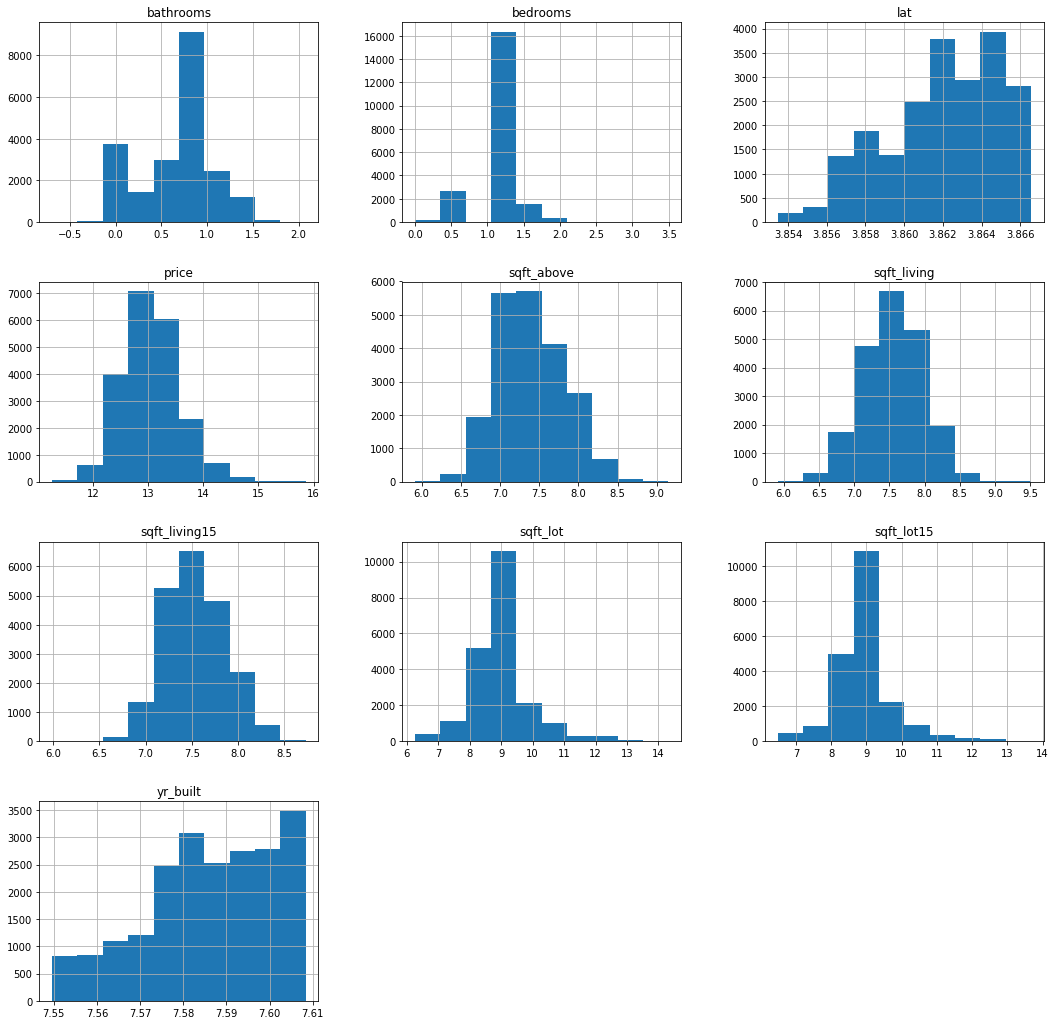

In [375]:
df_log.hist(figsize=(18,18))

In [376]:
col_names = df_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King Cty: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]});
    preds10 = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King Cty: price~bedrooms
------------------------------
['bedrooms', 0.11690843421819974, 12.298372771661583, 0.636695731004518, 0.0]
King Cty: price~bathrooms
------------------------------
['bathrooms', 0.26999400394509154, 12.575420361580466, 0.6975426264753711, 0.0]
King Cty: price~sqft_living
------------------------------
['sqft_living', 0.45487390817074236, 6.725492042621472, 0.8373565737137357, 0.0]
King Cty: price~sqft_lot
------------------------------
['sqft_lot', 0.01912643850674456, 12.32211855226208, 0.08076135917588545, 1.5829053476127593e-90]
King Cty: price~sqft_above
------------------------------
['sqft_above', 0.34318242539406985, 7.707525685549353, 0.7221650180792579, 0.0]
King Cty: price~yr_built
------------------------------
['yr_built', 0.006334731497952939, -8.23672528771101, 2.8057460377117778, 5.581153245811331e-31]
King Cty: price~lat
------------------------------
['lat', 0.20235359793984176, -300.60385810782566, 81.21502606449494, 0.0]
King Cty: price~sqf

In [377]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.116908,12.2984,0.636696,0
2,bathrooms,0.269994,12.5754,0.697543,0
3,sqft_living,0.454874,6.72549,0.837357,0
4,sqft_lot,0.0191264,12.3221,0.0807614,1.58291e-90
5,sqft_above,0.343182,7.70753,0.722165,0
6,yr_built,0.00633473,-8.23673,2.80575,5.58115e-31
7,lat,0.202354,-300.604,81.215,0
8,sqft_living15,0.369164,5.68335,0.976819,0
9,sqft_lot15,0.0154238,12.3259,0.0806026,3.10906e-73


Log transformed data looks very similar to Z score normalized data.  Keeping Z score data.  Next step is to model categorical predictors.

In [393]:
df_cat = df
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 48 columns):
price                  21082 non-null float64
bedrooms               21082 non-null float64
bathrooms              21082 non-null float64
sqft_living            21082 non-null float64
sqft_lot               21082 non-null float64
sqft_above             21082 non-null float64
sqft_basement          21082 non-null float64
yr_built               21082 non-null float64
lat                    21082 non-null float64
long                   21082 non-null float64
sqft_living15          21082 non-null float64
sqft_lot15             21082 non-null float64
floors_1               21082 non-null category
floors_2               21082 non-null category
floors_3               21082 non-null category
waterfront_no          21082 non-null category
waterfront_yes         21082 non-null category
view_0                 21082 non-null category
view_1                 21082 non-null category
view_2    

In [394]:
df_cat.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1', 'floors_2', 'floors_3',
       'waterfront_no', 'waterfront_yes', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'renovated_no', 'renovated_yes',
       'zipcode_98000_98025', 'zipcode_98025_98050', 'zipcode_98050_98075',
       'zipcode_98075_98100', 'zipcode_98100_98125', 'zipcode_98125_98150',
       'zipcode_98150_98175', 'zipcode_98175_98200'],
      dtype='object')

In [395]:
df_cat = df_cat.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis=1)

Dropping the numerical data above, and dropping one of each dummy columns below for singularity.

In [396]:
df_cat1 = df_cat.drop(['floors_1', 'waterfront_no', 'view_0', 'condition_1', 'grade_3', 'renovated_no', 'zipcode_98175_98200'], axis=1)

In [397]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [398]:
predictors11 = df_cat1.drop('price', axis=1)
pred_sum = "+".join(predictors11.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_cat1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1252.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        08:58:28   Log-Likelihood:            -2.8946e+05
No. Observations:               21082   AIC:                         5.790e+05
Df Residuals:                   21052   BIC:                         5.792e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.093e+05   2.27e+05      0.483      0.629   -3.35e+05    5.53e+05
floors_2[T.1]            -1739.3249   3940.893     -0.441      0.659   -9463.777    5985.128
floors_3[T.1]            -9.123e+04   9925.647     -9.192      0.000   -1.11e+05   -7.18e+04
waterfront_yes[T.1]        5.55e+05   2.29e+04     24.237      0.000     5.1e+05       6e+05
view_1[T.1]               1.725e+05   1.25e+04     13.796      0.000    1.48e+05    1.97e+05
view_2[T.1]               1.067e+05   7626.362     13.990      0.000    9.17e+04    1.22e+05
view_3[T.1]               1.788e+05   1.04e+04     17.243      0.000    1.58e+05    1.99e+05
view_4[T.1]                3.32e+05   1.58e+04     21.068      0.000    3.01e+05    3.63e+05
condition_2[T.1]         -7345.5380   4.56e+04     -0.161      0.872   -9.67e+04     8.2e+04
condition_3[T.1]          1944.6169   4.24e+04      0.046      0.963   -8.12e+04    8.51e+04
condition_4[T.1]          6.588e+04   4.24e+04      1.552      0.121   -1.73e+04    1.49e+05
condition_5[T.1]          1.403e+05   4.27e+04      3.289      0.001    5.67e+04    2.24e+05
grade_4[T.1]              3.211e+04   2.27e+05      0.142      0.887   -4.12e+05    4.76e+05
grade_5[T.1]              4.864e+04   2.23e+05      0.218      0.827   -3.88e+05    4.85e+05
grade_6[T.1]              9.177e+04   2.22e+05      0.413      0.680   -3.44e+05    5.28e+05
grade_7[T.1]              2.041e+05   2.22e+05      0.918      0.359   -2.32e+05     6.4e+05
grade_8[T.1]              3.545e+05   2.22e+05      1.594      0.111   -8.15e+04     7.9e+05
grade_9[T.1]              5.859e+05   2.22e+05      2.634      0.008     1.5e+05    1.02e+06
grade_10[T.1]              8.68e+05   2.23e+05      3.901      0.000    4.32e+05     1.3e+06
grade_11[T.1]             1.262e+06   2.23e+05      5.666      0.000    8.25e+05     1.7e+06
grade_12[T.1]             1.859e+06   2.24e+05      8.308      0.000    1.42e+06     2.3e+06
grade_13[T.1]              3.41e+06   2.31e+05     14.769      0.000    2.96e+06    3.86e+06
renovated_yes[T.1]        1.566e+05   8525.810     18.372      0.000     1.4e+05    1.73e+05
zipcode_98000_98025[T.1]  1.234e+04   7450.864      1.657      0.098   -2261.000    2.69e+04
zipcode_98025_98050[T.1]  1.502e+04   7356.914      2.041      0.041     598.997    2.94e+04
zipcode_98050_98075[T.1] -1.005e+04   7454.410     -1.348      0.178   -2.47e+04    4560.063
zipcode_98075_98100[T.1] -1.269e+05   1.17e+04    -10.860      0.000    -1.5e+05   -1.04e+05
zipcode_98100_98125[T.1]  1.506e+05   7211.466     20.877      0.000    1.36e+05    1.65e+05
zipcode_98125_98150[T.1]  3.304e+04   8335.133      3.964      0.000    1.67e+04    4.94e+04
zipcode_98150_98175[T.1] -2.993e+04   9681.146     -3.091      0.002   -4.89e+04    -1.1e+04
==============

Only predictors that have a p-value of <0.05 are renovated_yes and waterfront_yes.  Dropping all columns and will run analysis again.

In [400]:
df_cat1 = df_cat1.drop(['floors_2', 'condition_2', 'condition_3', 'condition_4',
       'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'zipcode_98000_98025', 'zipcode_98050_98075'], axis=1)

In [402]:
df_cat1.columns

Index(['price', 'floors_3', 'waterfront_yes', 'view_1', 'view_2', 'view_3',
       'view_4', 'condition_5', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'renovated_yes', 'zipcode_98025_98050',
       'zipcode_98075_98100', 'zipcode_98100_98125', 'zipcode_98125_98150',
       'zipcode_98150_98175'],
      dtype='object')

In [403]:
predictors12 = df_cat1.drop('price', axis=1)
pred_sum = "+".join(predictors12.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_cat1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1639.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:00:09   Log-Likelihood:            -2.9079e+05
No. Observations:               21082   AIC:                         5.816e+05
Df Residuals:                   21063   BIC:                         5.818e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.804e+05   2803.175    135.688      0.000    3.75e+05    3.86e+05
floors_3[T.1]            -2.855e+04   1.01e+04     -2.823      0.005   -4.84e+04   -8729.776
waterfront_yes[T.1]        5.33e+05   2.44e+04     21.876      0.000    4.85e+05    5.81e+05
view_1[T.1]               2.068e+05   1.33e+04     15.610      0.000    1.81e+05    2.33e+05
view_2[T.1]               1.423e+05   8039.109     17.702      0.000    1.27e+05    1.58e+05
view_3[T.1]               2.197e+05    1.1e+04     20.056      0.000    1.98e+05    2.41e+05
view_4[T.1]               3.773e+05   1.67e+04     22.605      0.000    3.45e+05     4.1e+05
condition_5[T.1]          1.042e+05   6105.259     17.068      0.000    9.22e+04    1.16e+05
grade_9[T.1]              3.232e+05   5136.546     62.918      0.000    3.13e+05    3.33e+05
grade_10[T.1]             5.991e+05   7498.038     79.902      0.000    5.84e+05    6.14e+05
grade_11[T.1]             9.858e+05   1.24e+04     79.699      0.000    9.62e+05    1.01e+06
grade_12[T.1]             1.581e+06   2.56e+04     61.764      0.000    1.53e+06    1.63e+06
grade_13[T.1]             3.129e+06   6.59e+04     47.500      0.000       3e+06    3.26e+06
renovated_yes[T.1]        1.551e+05   9054.551     17.126      0.000    1.37e+05    1.73e+05
zipcode_98025_98050[T.1]  1.711e+04   4436.441      3.856      0.000    8409.417    2.58e+04
zipcode_98075_98100[T.1] -1.081e+05   1.06e+04    -10.238      0.000   -1.29e+05   -8.74e+04
zipcode_98100_98125[T.1]  1.284e+05   4406.038     29.153      0.000     1.2e+05    1.37e+05
zipcode_98125_98150[T.1] -5479.1488   6297.299     -0.870      0.384   -1.78e+04    6864.039
zipcode_98150_98175[T.1] -7.847e+04   8159.687     -9.617      0.000   -9.45e+04   -6.25e+04
==============================================================================
Omnibus:                    12586.652   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462036.189
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                      25.474   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
df_cat1 = df_cat1.drop(['zipcode_98125_98150'], axis=1)

In [406]:
predictors13 = df_cat1.drop('price', axis=1)
pred_sum = "+".join(predictors13.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_cat1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1736.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:02:44   Log-Likelihood:            -2.9079e+05
No. Observations:               21082   AIC:                         5.816e+05
Df Residuals:                   21064   BIC:                         5.818e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.794e+05   2574.908    147.342      0.000    3.74e+05    3.84e+05
floors_3[T.1]            -2.918e+04   1.01e+04     -2.893      0.004    -4.9e+04   -9407.218
waterfront_yes[T.1]       5.333e+05   2.44e+04     21.891      0.000    4.86e+05    5.81e+05
view_1[T.1]               2.065e+05   1.32e+04     15.591      0.000    1.81e+05    2.32e+05
view_2[T.1]                1.42e+05   8033.435     17.682      0.000    1.26e+05    1.58e+05
view_3[T.1]               2.194e+05   1.09e+04     20.040      0.000    1.98e+05    2.41e+05
view_4[T.1]               3.769e+05   1.67e+04     22.589      0.000    3.44e+05     4.1e+05
condition_5[T.1]           1.04e+05   6101.335     17.048      0.000    9.21e+04    1.16e+05
grade_9[T.1]              3.236e+05   5109.831     63.336      0.000    3.14e+05    3.34e+05
grade_10[T.1]             5.997e+05   7467.152     80.312      0.000    5.85e+05    6.14e+05
grade_11[T.1]             9.865e+05   1.23e+04     79.933      0.000    9.62e+05    1.01e+06
grade_12[T.1]             1.582e+06   2.56e+04     61.825      0.000    1.53e+06    1.63e+06
grade_13[T.1]              3.13e+06   6.59e+04     47.518      0.000       3e+06    3.26e+06
renovated_yes[T.1]        1.548e+05   9047.199     17.105      0.000    1.37e+05    1.72e+05
zipcode_98025_98050[T.1]  1.799e+04   4317.374      4.168      0.000    9530.994    2.65e+04
zipcode_98075_98100[T.1] -1.073e+05   1.05e+04    -10.201      0.000   -1.28e+05   -8.67e+04
zipcode_98100_98125[T.1]  1.295e+05   4244.296     30.507      0.000    1.21e+05    1.38e+05
zipcode_98150_98175[T.1] -7.748e+04   8079.659     -9.590      0.000   -9.33e+04   -6.16e+04
==============================================================================
Omnibus:                    12590.503   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462046.089
Skew:                           2.288   Prob(JB):                         0.00
Kurtosis:                      25.474   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
df_cat2 = df_cat1

In [408]:
df_cat2 = df_cat1.drop(['price'],axis=1)

In [410]:
df_cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
floors_3               21082 non-null category
waterfront_yes         21082 non-null category
view_1                 21082 non-null category
view_2                 21082 non-null category
view_3                 21082 non-null category
view_4                 21082 non-null category
condition_5            21082 non-null category
grade_9                21082 non-null category
grade_10               21082 non-null category
grade_11               21082 non-null category
grade_12               21082 non-null category
grade_13               21082 non-null category
renovated_yes          21082 non-null category
zipcode_98025_98050    21082 non-null category
zipcode_98075_98100    21082 non-null category
zipcode_98100_98125    21082 non-null category
zipcode_98150_98175    21082 non-null category
dtypes: category(17)
memory usage: 516.3 KB


In [411]:
df_1 = df

In [413]:
df_1 = df_1.drop(['bedrooms', 'bathrooms', 'sqft_lot',
       'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_lot15', 'floors_1', 'floors_2', 'floors_3',
       'waterfront_no', 'waterfront_yes', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'renovated_no', 'renovated_yes'], axis=1)

In [415]:
 df_1 = df_1.drop(['zipcode_98000_98025', 'zipcode_98025_98050', 'zipcode_98050_98075',
       'zipcode_98075_98100', 'zipcode_98100_98125', 'zipcode_98125_98150',
       'zipcode_98150_98175', 'zipcode_98175_98200'], axis=1)

In [416]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 4 columns):
price            21082 non-null float64
sqft_living      21082 non-null float64
sqft_above       21082 non-null float64
sqft_living15    21082 non-null float64
dtypes: float64(4)
memory usage: 823.5 KB


In [417]:
df_final = pd.concat([df_1, df_cat2],axis=1)

In [418]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
price                  21082 non-null float64
sqft_living            21082 non-null float64
sqft_above             21082 non-null float64
sqft_living15          21082 non-null float64
floors_3               21082 non-null category
waterfront_yes         21082 non-null category
view_1                 21082 non-null category
view_2                 21082 non-null category
view_3                 21082 non-null category
view_4                 21082 non-null category
condition_5            21082 non-null category
grade_9                21082 non-null category
grade_10               21082 non-null category
grade_11               21082 non-null category
grade_12               21082 non-null category
grade_13               21082 non-null category
renovated_yes          21082 non-null category
zipcode_98025_98050    21082 non-null category
zipcode_98075_98100    21082 non-null category
zi

In [419]:
df_final1 = df_final

In [420]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
price                  21082 non-null float64
sqft_living            21082 non-null float64
sqft_above             21082 non-null float64
sqft_living15          21082 non-null float64
floors_3               21082 non-null category
waterfront_yes         21082 non-null category
view_1                 21082 non-null category
view_2                 21082 non-null category
view_3                 21082 non-null category
view_4                 21082 non-null category
condition_5            21082 non-null category
grade_9                21082 non-null category
grade_10               21082 non-null category
grade_11               21082 non-null category
grade_12               21082 non-null category
grade_13               21082 non-null category
renovated_yes          21082 non-null category
zipcode_98025_98050    21082 non-null category
zipcode_98075_98100    21082 non-null category
zi

In [421]:
predictors14 = df_final1.drop('price', axis=1)
pred_sum = "+".join(predictors14.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_final1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2249.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:07:52   Log-Likelihood:            -2.8798e+05
No. Observations:               21082   AIC:                         5.760e+05
Df Residuals:                   21061   BIC:                         5.762e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.297e+05   2339.183    183.708      0.000    4.25e+05    4.34e+05
floors_3[T.1]             1.912e+04   8910.584      2.146      0.032    1656.902    3.66e+04
waterfront_yes[T.1]       5.531e+05   2.13e+04     25.934      0.000    5.11e+05    5.95e+05
view_1[T.1]               1.332e+05   1.17e+04     11.405      0.000     1.1e+05    1.56e+05
view_2[T.1]               7.735e+04   7128.301     10.851      0.000    6.34e+04    9.13e+04
view_3[T.1]               1.276e+05   9751.372     13.082      0.000    1.08e+05    1.47e+05
view_4[T.1]               2.723e+05   1.48e+04     18.450      0.000    2.43e+05    3.01e+05
condition_5[T.1]          9.235e+04   5378.991     17.169      0.000    8.18e+04    1.03e+05
grade_9[T.1]              1.287e+05   5258.844     24.465      0.000    1.18e+05    1.39e+05
grade_10[T.1]             2.916e+05   7799.754     37.386      0.000    2.76e+05    3.07e+05
grade_11[T.1]             5.302e+05   1.25e+04     42.556      0.000    5.06e+05    5.55e+05
grade_12[T.1]             9.537e+05   2.39e+04     39.905      0.000    9.07e+05       1e+06
grade_13[T.1]             2.207e+06    5.9e+04     37.407      0.000    2.09e+06    2.32e+06
renovated_yes[T.1]        1.277e+05   7936.873     16.094      0.000    1.12e+05    1.43e+05
zipcode_98025_98050[T.1]  6347.4348   3782.995      1.678      0.093   -1067.525    1.38e+04
zipcode_98075_98100[T.1] -1.344e+05   9231.256    -14.559      0.000   -1.52e+05   -1.16e+05
zipcode_98100_98125[T.1]  1.746e+05   3843.849     45.423      0.000    1.67e+05    1.82e+05
zipcode_98150_98175[T.1] -3.878e+04   7104.765     -5.458      0.000   -5.27e+04   -2.49e+04
sqft_living               1.466e+05   3356.151     43.693      0.000     1.4e+05    1.53e+05
sqft_above               -1.317e+04   3301.060     -3.989      0.000   -1.96e+04   -6696.879
sqft_living15              4.43e+04   2388.838     18.545      0.000    3.96e+04     4.9e+04
==============================================================================
Omnibus:                    12049.716   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428609.939
Skew:                           2.152   Prob(JB):                         0.00
Kurtosis:                      24.666   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [422]:
df_final1 = df_final1.drop(['zipcode_98025_98050'], axis=1)

In [423]:
predictors15 = df_final1.drop('price', axis=1)
pred_sum = "+".join(predictors15.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_final1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2367.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:09:07   Log-Likelihood:            -2.8798e+05
No. Observations:               21082   AIC:                         5.760e+05
Df Residuals:                   21062   BIC:                         5.762e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.316e+05   2049.992    210.546      0.000    4.28e+05    4.36e+05
floors_3[T.1]             1.887e+04   8909.687      2.118      0.034    1405.174    3.63e+04
waterfront_yes[T.1]       5.532e+05   2.13e+04     25.938      0.000    5.11e+05    5.95e+05
view_1[T.1]               1.331e+05   1.17e+04     11.396      0.000     1.1e+05    1.56e+05
view_2[T.1]                 7.7e+04   7125.637     10.806      0.000     6.3e+04     9.1e+04
view_3[T.1]                1.27e+05   9746.800     13.035      0.000    1.08e+05    1.46e+05
view_4[T.1]               2.718e+05   1.48e+04     18.415      0.000    2.43e+05    3.01e+05
condition_5[T.1]          9.226e+04   5378.944     17.152      0.000    8.17e+04    1.03e+05
grade_9[T.1]              1.285e+05   5258.264     24.438      0.000    1.18e+05    1.39e+05
grade_10[T.1]             2.913e+05   7797.450     37.353      0.000    2.76e+05    3.07e+05
grade_11[T.1]             5.297e+05   1.25e+04     42.529      0.000    5.05e+05    5.54e+05
grade_12[T.1]             9.534e+05   2.39e+04     39.891      0.000    9.07e+05       1e+06
grade_13[T.1]             2.206e+06    5.9e+04     37.395      0.000    2.09e+06    2.32e+06
renovated_yes[T.1]        1.275e+05   7936.282     16.070      0.000    1.12e+05    1.43e+05
zipcode_98075_98100[T.1] -1.363e+05   9161.055    -14.879      0.000   -1.54e+05   -1.18e+05
zipcode_98100_98125[T.1]  1.729e+05   3710.080     46.606      0.000    1.66e+05     1.8e+05
zipcode_98150_98175[T.1] -4.052e+04   7029.079     -5.764      0.000   -5.43e+04   -2.67e+04
sqft_living               1.466e+05   3356.166     43.678      0.000     1.4e+05    1.53e+05
sqft_above                 -1.3e+04   3299.683     -3.940      0.000   -1.95e+04   -6531.506
sqft_living15             4.438e+04   2388.455     18.582      0.000    3.97e+04    4.91e+04
==============================================================================
Omnibus:                    12055.599   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428927.495
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      24.674   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Validation

In [424]:
y = df_final1[["price"]]
X = df_final1.drop(["price"], axis=1)
X.head()

,sqft_living,sqft_above,sqft_living15,floors_3,waterfront_yes,view_1,view_2,view_3,view_4,condition_5,grade_9,grade_10,grade_11,grade_12,grade_13,renovated_yes,zipcode_98075_98100,zipcode_98100_98125,zipcode_98150_98175
0,-0.980938,-0.735179,-0.943655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.533460,0.459940,-0.433112,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,-1.427631,-1.230128,1.069344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.131132,-0.892114,-0.914481,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.436190,-0.131584,-0.272656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [425]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [436]:
r_list = []
adj_r_list = []
list_n = list(range(2,20,2))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.128832
dtype: float64
price    0.128046
dtype: float64
price    0.304651
dtype: float64
price    0.304023
dtype: float64
price    0.438139
dtype: float64
price    0.437632
dtype: float64
price    0.642926
dtype: float64
price    0.642604
dtype: float64
price    0.649512
dtype: float64
price    0.649196
dtype: float64
price    0.664903
dtype: float64
price    0.6646
dtype: float64
price    0.67086
dtype: float64
price    0.670563
dtype: float64
price    0.680329
dtype: float64
price    0.680041
dtype: float64
price    0.680855
dtype: float64
price    0.680567
dtype: float64


The r_squared vs r_squared adjusted is very similar each time.  This suggests that each time a feature is added, the predictive variance doesn't change.  The overall values increase with the addition of each couple of predictors.  This could lead to overfitting.

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(2,20,2))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    1.177698e+11
dtype: float64
price    1.149409e+11
dtype: float64
price    9.391292e+10
dtype: float64
price    9.224194e+10
dtype: float64
price    7.539057e+10
dtype: float64
price    7.650353e+10
dtype: float64
price    4.788135e+10
dtype: float64
price    4.878486e+10
dtype: float64
price    4.691026e+10
dtype: float64
price    4.826920e+10
dtype: float64
price    4.502577e+10
dtype: float64
price    4.548861e+10
dtype: float64
price    4.391483e+10
dtype: float64
price    4.473788e+10
dtype: float64
price    4.347689e+10
dtype: float64
price    4.434928e+10
dtype: float64
price    4.282524e+10
dtype: float64
price    4.356926e+10
dtype: float64


The mean squarred error between the test set and the train set are not different each time.  The values remain consistent when adding more predictors showing that having more predictors improves model performance.

In [429]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_19 = RFE(linreg, n_features_to_select = 19)
select_19 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-4.35991436e+10, -5.11194450e+10, -3.92330635e+10, -4.93443301e+10,
       -3.65430997e+10, -4.14657711e+10, -4.27394569e+10, -4.31379554e+10,
       -4.18007342e+10, -4.75654085e+10])

The cross score evaluation shows that randomly selecting a 10% group of the dataset yields close to the same mean squared error.